  
# Sentiment Analysis

In [1]:
!pip install torch
!pip install transformers
!pip3 install torch
!run pip install --user -U nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.0 MB/s eta 0:00:00
/bin/bash: line 1: run: command not found


In [2]:
from finbert import predict
import nltk
from transformers import AutoModelForSequenceClassification
nltk.download('punkt')
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
model = AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert',num_labels=3,cache_dir=None)

In [4]:
text="""Shares of auto major Tata Motors jumped over 4 percent to their record high on Friday after the company's arm Jaguar Land Rover (JLR) India reported its highest-ever performance in the first half of financial year 2023-24 (FY24). The company posted an over 97 percent year-on-year (YoY) jump in its total sales for April-September at 2,356 units from around 1,194 units in the same period last year. The stock rose as much as 4.4 percent to its all-time high of ₹665.50. It has advanced over 77 percent from its 52-week low of ₹375.50, hit on December 26, 2022.

The auto major has surged over 60 percent in the last 1 year and over 71 percent in 2023 YTD, giving positive returns in 8 of the 10 months so far. It has added 5.5 percent in October so far.In comparison, the Nifty Auto index added around 30 percent in the last 1 year as well as in 2023 YTD.

This growth in the first half of FY24 was driven by record sales in both quarters. Meanwhile, the September quarter (Q2FY24) also witnessed a massive 108 percent growth YoY at 1,308 units. It had previously reported a 102 percent sales growth in Q1 on a yearly basis.

"The consistent growth in our order book exemplifies the growing strength of our brand and products in the hearts of Indian consumers. The company would continue to introduce new products that are best suited to meet the discerning needs of customers and invest in strengthening brand desire and client experience," said JLR India Managing Director Rajan Amba."""

In [5]:
predict(text,model)

,sentence,logit,prediction,sentiment_score
0,Shares of auto major Tata Motors jumped over 4...,"[0.93754137, 0.031876218, 0.03058244]",positive,0.905665
1,The company posted an over 97 percent year-on-...,"[0.9475511, 0.03018109, 0.022267854]",positive,0.917370
2,The stock rose as much as 4.4 percent to its a...,"[0.93479604, 0.020259622, 0.044944447]",positive,0.914536
3,It has advanced over 77 percent from its 52-we...,"[0.94763094, 0.02564025, 0.02672889]",positive,0.921991
4,The auto major has surged over 60 percent in t...,"[0.9519143, 0.021647604, 0.026438119]",positive,0.930267
5,It has added 5.5 percent in October so far.In ...,"[0.8905778, 0.017328037, 0.09209417]",positive,0.873250
6,This growth in the first half of FY24 was driv...,"[0.95613736, 0.020092366, 0.023770295]",positive,0.936045
7,"Meanwhile, the September quarter (Q2FY24) also...","[0.9516192, 0.018569987, 0.029810792]",positive,0.933049
8,It had previously reported a 102 percent sales...,"[0.9279709, 0.012540599, 0.05948851]",positive,0.915430
9,"""The consistent growth in our order book exemp...","[0.9446649, 0.014618199, 0.04071701]",positive,0.930047


In [6]:
class Sentimental:
  def __init__(self, text, aver=0):
    self.text = text
    self.aver = aver

  def avgSentiment(self):
    model=AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert',num_labels=3,cache_dir=None)
    df=predict(text,model)

    polarNP = np.array(df["sentiment_score"].tolist())
    aver = np.sum(polarNP)/len(df)
    self.aver = aver
    return


test = Sentimental(text)
res = test.avgSentiment()
test.aver

0.9154997413808649

# Web Scraper

In [7]:
!pip install goose3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 890.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=0e040ae03f050bf81579de657a9f80196a15bd67712aeba8ce08e8099dba0e5a
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [8]:
from goose3 import Goose

In [9]:
from goose3 import Goose
url = "https://www.moneycontrol.com/news/business/tcs-wipro-infosys-added-record-1-7-lakh-employees-in-2021-7930061.html"
g = Goose()
article = g.extract(url=url)
article.title
article.cleaned_text

'Three IT companies -- TCS, Infosys and Wipro -- added a record 1.7 lakh employees for 2021, a multi-fold increase from the 31,000 they had hired in 2020. This jump in hiring comes on the back of acceleration in digital technologies and rising attrition.\n\nWith demand for technology services continuing to outstrip supply, the IT companies also stepped up their fresher hiring to meet the growing demand.\n\nFor the first three quarters of FY22, the three companies hired 1.34 lakh employees, compared with 35,000 between April and December 2020.\n\nThe three IT firms stepped up their fresher hiring numbers in FY22. At 17,500, Wipro’s fresher hiring is 70 percent more than what the company hired in FY21. Infosys will hire 55,000 freshers in FY22, and TCS has on-boarded a record 78,000 campus recruits so far.\n\nThis momentum is likely to continue in the next year as well.\n\nWhen the pandemic hit, it resulted in increased consumption of technology services as consumers adapted to online se

# SERP(search engine result page)

In [10]:
!pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32003 sha256=0a05bbc57cf2f410aa7ec3706aa2b5dfa3b2e9a982d7176fd343eb45b99dce5b
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


In [11]:


'''
search = GoogleSearch({
    "q": '"infosys" site:www.moneycontrol.com inurl:2021 filetype:html"',
    "location": "",
    "api_key": "ed09d22d123a41cab542c563919882c1460269e2b19f9f8803a27c7af888f324"
  })

result = search.get_dict()
print(result)
#print(result.keys())
#"infosys" site:www.moneycontrol.com inurl:2021 filetype:html
'''

'\nsearch = GoogleSearch({\n    "q": \'"infosys" site:www.moneycontrol.com inurl:2021 filetype:html"\',\n    "location": "",\n    "api_key": "ed09d22d123a41cab542c563919882c1460269e2b19f9f8803a27c7af888f324"\n  })\n\nresult = search.get_dict()\nprint(result)\n#print(result.keys())\n#"infosys" site:www.moneycontrol.com inurl:2021 filetype:html\n'

# Genral Sentiment(Integrated)

In [12]:
from goose3 import Goose
from serpapi import GoogleSearch

import pandas as pd
company = input("Enter the company: ")
site = "www.moneycontrol.com"

g = Goose()
data = pd.DataFrame()

y = []

#new_api_key = "ed09d22d123a41cab542c563919882c1460269e2b19f9f8803a27c7af888f324"
#old_api_key = "dba413672959ab722530ae3b1fddf9aeeb2e791b1e2eb9bea64aa4c901d77e0f"

year = 2021
func=True
for year in range (2021,2024):
  text = []
  def link_generator(company):
    search = GoogleSearch({
    "q": f'"{company}" site:{site} inurl:{year} filetype:html',
    "location": "",
    "api_key": "ed09d22d123a41cab542c563919882c1460269e2b19f9f8803a27c7af888f324"
      })

    result = search.get_dict()
    print(result)
    d = result['organic_results']

    link_list = []

    for i in d:
      l = i['link']
      if l[-1] == 'l':
        link_list.append(l)

    return link_list

  l = link_generator(company)
  for i in range(len(l)):
    print(f"{i+1}:{l[i]}")
  year=year+1

  print()


  for url in l:
    article = g.extract(url = url)
    #print(article.cleaned_text)
    text.append(article.cleaned_text)


  for t in text:
    p = predict(t,model)
    #print(p)
    data = data.append(p, ignore_index=True)

  y.append(len(data))

  display(data)




'''
for i in range(3):
  search = GoogleSearch({
    "q": f"{company} site:{site} inurl:{year} filetype:html",
    "location": "",
    "api_key": "dba413672959ab722530ae3b1fddf9aeeb2e791b1e2eb9bea64aa4c901d77e0f"
  })

  result = search.get_dict()

  year = year+1
'''





Enter the company: apple
{'search_metadata': {'id': '65466682d737d7b57e87f18f', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/5d85e384f481528e/65466682d737d7b57e87f18f.json', 'created_at': '2023-11-04 15:42:58 UTC', 'processed_at': '2023-11-04 15:42:58 UTC', 'google_url': 'https://www.google.com/search?q=%22apple%22+site%3Awww.moneycontrol.com+inurl%3A2021+filetype%3Ahtml&oq=%22apple%22+site%3Awww.moneycontrol.com+inurl%3A2021+filetype%3Ahtml&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/5d85e384f481528e/65466682d737d7b57e87f18f.html', 'total_time_taken': 1.65}, 'search_parameters': {'engine': 'google', 'q': '"apple" site:www.moneycontrol.com inurl:2021 filetype:html', 'google_domain': 'google.com', 'device': 'desktop'}, 'search_information': {'query_displayed': '"apple" site:www.moneycontrol.com inurl:2021 filetype:html', 'total_results': 741, 'time_taken_displayed': 0.27, 'menu_items': [{'position': 1, 'title': 'Images', 'link': 'http

<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

,sentence,logit,prediction,sentiment_score
0,Apple just concluded its Unleashed 2021 event.,"[0.034184586, 0.08825761, 0.87755775]",neutral,-0.054073
1,The tech giant used the event to unveil a coup...,"[0.1420904, 0.010176377, 0.8477332]",neutral,0.131914
2,The new 14-inch and 16-inch MacBook Pro models...,"[0.09470292, 0.010147802, 0.8951493]",neutral,0.084555
3,Apple says that this is the first time that So...,"[0.14563613, 0.008129713, 0.84623414]",neutral,0.137506
4,The company also revealed a new HomePod Mini a...,"[0.21423525, 0.0090321, 0.7767327]",neutral,0.205203
...,...,...,...,...
191,"In a recent tweet, Prosser also shared his sce...","[0.07897393, 0.60138756, 0.3196385]",negative,-0.522414
192,Another tipster also replied to a message by a...,"[0.088837534, 0.15489364, 0.75626886]",neutral,-0.066056
193,"Even so, Apple could tease or announce a new A...","[0.20184878, 0.0121885855, 0.7859627]",neutral,0.189660
194,We’ll just have to wait and see.,"[0.030293945, 0.16097638, 0.8087297]",neutral,-0.130682


{'search_metadata': {'id': '654666b57f83613170a0b2fe', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/743eed8357df1627/654666b57f83613170a0b2fe.json', 'created_at': '2023-11-04 15:43:49 UTC', 'processed_at': '2023-11-04 15:43:49 UTC', 'google_url': 'https://www.google.com/search?q=%22apple%22+site%3Awww.moneycontrol.com+inurl%3A2022+filetype%3Ahtml&oq=%22apple%22+site%3Awww.moneycontrol.com+inurl%3A2022+filetype%3Ahtml&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/743eed8357df1627/654666b57f83613170a0b2fe.html', 'total_time_taken': 2.45}, 'search_parameters': {'engine': 'google', 'q': '"apple" site:www.moneycontrol.com inurl:2022 filetype:html', 'google_domain': 'google.com', 'device': 'desktop'}, 'search_information': {'query_displayed': '"apple" site:www.moneycontrol.com inurl:2022 filetype:html', 'total_results': 592, 'time_taken_displayed': 0.53, 'menu_items': [{'position': 1, 'title': 'Images', 'link': 'https://www.google.com/search

<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

,sentence,logit,prediction,sentiment_score
0,Apple just concluded its Unleashed 2021 event.,"[0.034184586, 0.08825761, 0.87755775]",neutral,-0.054073
1,The tech giant used the event to unveil a coup...,"[0.1420904, 0.010176377, 0.8477332]",neutral,0.131914
2,The new 14-inch and 16-inch MacBook Pro models...,"[0.09470292, 0.010147802, 0.8951493]",neutral,0.084555
3,Apple says that this is the first time that So...,"[0.14563613, 0.008129713, 0.84623414]",neutral,0.137506
4,The company also revealed a new HomePod Mini a...,"[0.21423525, 0.0090321, 0.7767327]",neutral,0.205203
...,...,...,...,...
321,It includes suggestions for age appropriate co...,"[0.05055411, 0.01656254, 0.9328833]",neutral,0.033992
322,Dictation now allows users to fluidly move bet...,"[0.08770577, 0.0134544475, 0.89883983]",neutral,0.074251
323,The Fitness and Health apps will now be coming...,"[0.27542698, 0.010684092, 0.71388894]",neutral,0.264743
324,"A new Security feature called Safety Check, al...","[0.037191775, 0.23434971, 0.7284585]",neutral,-0.197158


{'search_metadata': {'id': '654666db79627c42b3d430ec', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/fd5beb5f3ca2730b/654666db79627c42b3d430ec.json', 'created_at': '2023-11-04 15:44:27 UTC', 'processed_at': '2023-11-04 15:44:27 UTC', 'google_url': 'https://www.google.com/search?q=%22apple%22+site%3Awww.moneycontrol.com+inurl%3A2023+filetype%3Ahtml&oq=%22apple%22+site%3Awww.moneycontrol.com+inurl%3A2023+filetype%3Ahtml&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/fd5beb5f3ca2730b/654666db79627c42b3d430ec.html', 'total_time_taken': 0.92}, 'search_parameters': {'engine': 'google', 'q': '"apple" site:www.moneycontrol.com inurl:2023 filetype:html', 'google_domain': 'google.com', 'device': 'desktop'}, 'search_information': {'query_displayed': '"apple" site:www.moneycontrol.com inurl:2023 filetype:html', 'total_results': 418, 'time_taken_displayed': 0.59, 'menu_items': [{'position': 1, 'title': 'Images', 'link': 'https://www.google.com/search

<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(p, ignore_index=True)
<ipython-input-12-bb850639116b>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

,sentence,logit,prediction,sentiment_score
0,Apple just concluded its Unleashed 2021 event.,"[0.034184586, 0.08825761, 0.87755775]",neutral,-0.054073
1,The tech giant used the event to unveil a coup...,"[0.1420904, 0.010176377, 0.8477332]",neutral,0.131914
2,The new 14-inch and 16-inch MacBook Pro models...,"[0.09470292, 0.010147802, 0.8951493]",neutral,0.084555
3,Apple says that this is the first time that So...,"[0.14563613, 0.008129713, 0.84623414]",neutral,0.137506
4,The company also revealed a new HomePod Mini a...,"[0.21423525, 0.0090321, 0.7767327]",neutral,0.205203
...,...,...,...,...
440,Phone sales have declined for eight consecutiv...,"[0.0073168525, 0.9755166, 0.017166495]",negative,-0.968200
441,Chinese Android brands Vivo and Xiaomi both su...,"[0.013800118, 0.9686627, 0.017537171]",negative,-0.954863
442,Counterpoint estimates that Apple’s sales slid...,"[0.1566564, 0.8212967, 0.022046918]",negative,-0.664640
443,"“Apple is riding this ‘premiumization’ wave, r...","[0.9336513, 0.01636713, 0.049981575]",positive,0.917284


'\nfor i in range(3):\n  search = GoogleSearch({\n    "q": f"{company} site:{site} inurl:{year} filetype:html",\n    "location": "",\n    "api_key": "dba413672959ab722530ae3b1fddf9aeeb2e791b1e2eb9bea64aa4c901d77e0f"\n  })\n\n  result = search.get_dict()\n\n  year = year+1\n'

In [13]:
print(y)
alpha = 0.125
u_0 = np.sum(data['sentiment_score'])/len(data)
n = len(data)

u_values = [u_0]

for i in range(1, n):
    r_n = data.loc[i, 'sentiment_score']
    u_n = (1 - alpha) * u_values[i - 1] + alpha * r_n
    u_values.append(u_n)


for i, u in enumerate(u_values):
    print(f'u_{i} = {u}')


threshold = sum(u_values)/len(u_values)




[196, 326, 445]
u_0 = 0.0586885002221954
u_1 = 0.06784169014250294
u_2 = 0.06993086878419591
u_3 = 0.07837781149611461
u_4 = 0.09423097827690233
u_5 = 0.09126850187853193
u_6 = 0.09374524347549491
u_7 = 0.1880900665471463
u_8 = 0.2788629138276796
u_9 = 0.2620732998679174
u_10 = 0.23612297805411928
u_11 = 0.21842021448642412
u_12 = 0.22237474337544638
u_13 = 0.22296338131935173
u_14 = 0.22110437348034906
u_15 = 0.19980499624812167
u_16 = 0.28493195071471844
u_17 = 0.26153195688199476
u_18 = 0.23643450938599847
u_19 = 0.3237947958466445
u_20 = 0.3993318349656865
u_21 = 0.36097639543019033
u_22 = 0.3283195855039061
u_23 = 0.2893647614583858
u_24 = 0.2611894085290335
u_25 = 0.23833637771477445
u_26 = 0.21523739007896558
u_27 = 0.22251191580606577
u_28 = 0.20933278142187936
u_29 = 0.18240694350428582
u_30 = 0.20897342888637185
u_31 = 0.20635924848028347
u_32 = 0.21443111671104814
u_33 = 0.21330542031882144
u_34 = 0.19410547027079458
u_35 = 0.18399706528039944
u_36 = 0.1832448937224413
u_37 

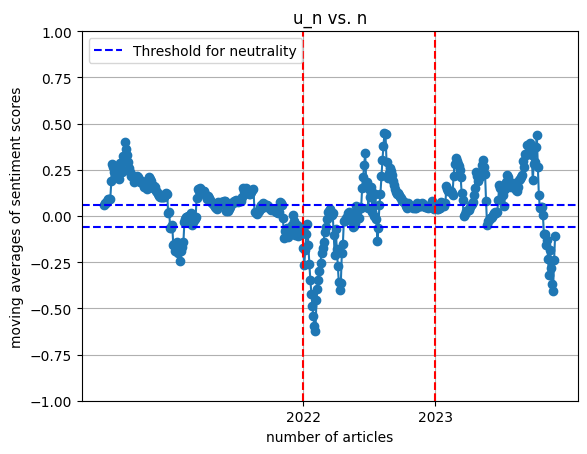

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:

import os
from google.colab import files
import matplotlib.pyplot as plt
indices = list(range(n))

# Define the directory path and the file name based on variables
directory_path = "C:/Users/prana/Downloads/"  # Replace with your desired directory path
fname = f'{company}.png'  # Replace this with your variable

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Define the full file path
file_path = os.path.join(directory_path, fname)

# Plot the u values
plt.plot(indices, u_values, marker='o', linestyle='-')
plt.title('u_n vs. n')
plt.xlabel('number of articles')
plt.ylabel('moving averages of sentiment scores')
plt.ylim(-1, 1)
plt.axhline(y=threshold, color='b', linestyle='--', label='Threshold for neutrality')
plt.axhline(y=-threshold, color='b', linestyle='--')
plt.axvline(x=y[0], color='r', linestyle='--')
plt.axvline(x=y[1], color='r', linestyle='--')
plt.xticks([y[0], y[1]], ['2022', '2023'])
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(file_path)

# Display the plot (optional, comment out if not needed)
plt.show()

# Provide the file name for download
files.download(file_path)



In [21]:
!pip install gradio
!pip install typing-extensions --upgrade
!pip install --upgrade typing-extensions
!pip install pillow

In [27]:

!pip install Gradio

import gradio as gr
from PIL import Image


# Create a dictionary that maps stock symbols to image file paths
company_images = {
    "infosys": "C:/Users/prana/Downloads/infosys.png",
    "tata": "C:/Users/prana/Downloads/tata.png",
    "nestle": "C:/Users/prana/Downloads/nestle.png"
}

company_images[f'{company}'] = f'C:/Users/prana/Downloads/{company}.png'

# Function to generate a plot or display the corresponding company's image
def generate_stock_plot(stock):
    if stock in company_images:
        image_path = company_images[stock]
        image = Image.open(image_path)
    else:
        # Display a default image if the stock symbol is not found
        image_path = "default_image.png"
        image = Image.open(image_path)

    if threshold >= 0.2:
        paragraph = f"Exponential moving average = {threshold}. This stock has a positive sentiment and the current morale of the stock is high. Currently, the public has a positive opinion about the company in the market."
    else:
        paragraph = f"Exponential moving average = {threshold}. This stock's sentiment is neutral or negative. The recent decisions taken by the company have been reflected poorly by the public."

    return image, paragraph

# Create a Gradio interface

iface = gr.Interface(
    fn=generate_stock_plot,
    inputs="text",
    outputs=["image", "text"],
    title="Stock Information App",
    description="Enter a stock to get the corresponding company's performance.",
)


iface.launch()


ImportError: ignored